In [2]:
# https://archive.ics.uci.edu/ml/datasets/student+performance

# http://www3.dsi.uminho.pt/pcortez/student.pdf


# Please include this citation if you plan to use this database: 
# P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. 

In [156]:
import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib.pyplot as plt

import matplotlib.image as mpimg

import warnings
warnings.simplefilter("ignore")

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBClassifier
from xgboost import XGBRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.compose import TransformedTargetRegressor



In [4]:
df = pd.read_csv('student-grades.csv')

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.shape

(395, 33)

In [6]:
df.isnull().values.any()

False

In [7]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
df.describe(include=[np.object])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


# Feature Augmentation

In [10]:
# create pass and fail column

df['pass'] = np.where(df['G3'] >= 10, 'pass', 'fail')


In [11]:
# create letter grade column

df.loc[df['G3'] < 10, 'Grade'] = 'F'
df.loc[(df['G3'] >= 10) & (df['G3'] <= 11), 'Grade'] = 'D'
df.loc[(df['G3'] >= 12) & (df['G3'] <= 13), 'Grade'] = 'C'
df.loc[(df['G3'] >= 14) & (df['G3'] <= 15), 'Grade'] = 'B'
df.loc[df['G3'] >= 16, 'Grade'] = 'A'

In [12]:
# create column to average trimester 1 and trimester 2 grades (G1 & G2)

df['G1G2_Avg'] = (df['G1']+ df['G2'])/2

In [13]:
# create column to look at the trend going from G1 to G2

df['trend'] = (df['G2'] - df['G1'])

# Exploratory EDA

In [14]:
# set all graph backgrounds to white

plt.rcParams['axes.facecolor'] = 'white'

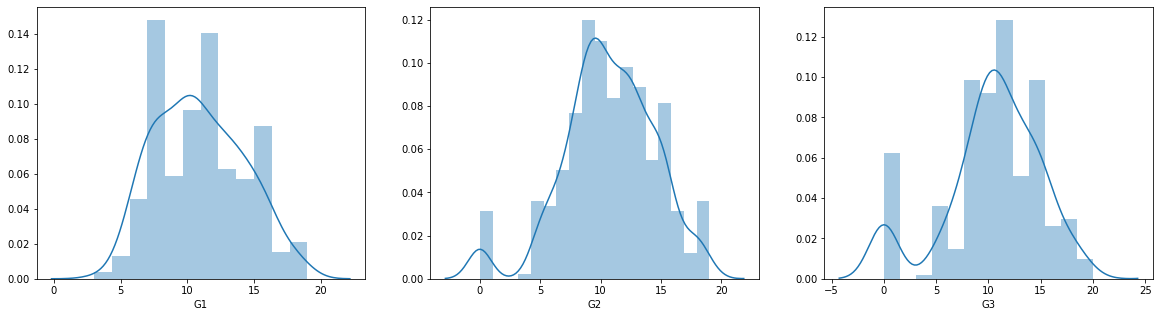

In [15]:
# plot distributions of all the trimester grades

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

G1 = sns.distplot(df['G1'], ax=axs[0])
G2 = sns.distplot(df['G2'], ax=axs[1])
G3 = sns.distplot(df['G3'], ax=axs[2])

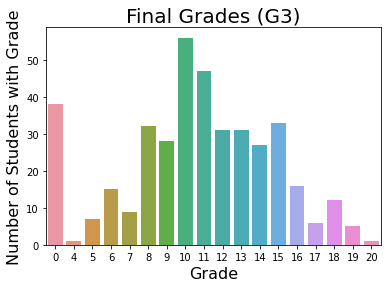

In [16]:
# plot distribution of final grade

sns.countplot(x='G3', data=df)

plt.title("Final Grades (G3)", fontsize=20)
plt.xlabel("Grade", fontsize=16)
plt.ylabel("Number of Students with Grade", fontsize=16)


plt.show()

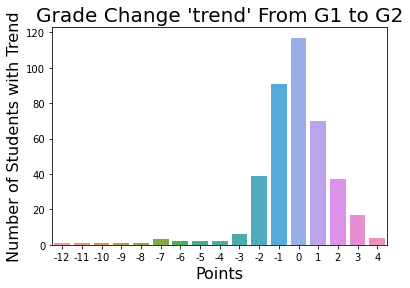

In [17]:
# plot trend

sns.countplot(x='trend', data=df)

plt.title("Grade Change 'trend' From G1 to G2", fontsize=20)
plt.xlabel("Points", fontsize=16)
plt.ylabel("Number of Students with Trend", fontsize=16)


plt.show()

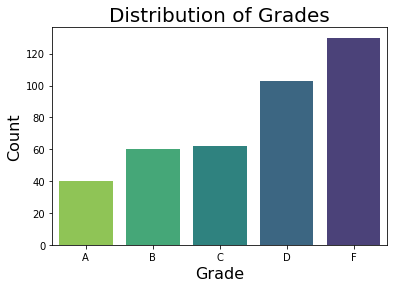

In [18]:
order = ['A', 'B', 'C', 'D', 'F'] 

sns.countplot(df['Grade'],  order=order , palette='viridis_r')

plt.title("Distribution of Grades", fontsize=20)
plt.xlabel("Grade", fontsize=16)
plt.ylabel("Count", fontsize=16)

plt.show()

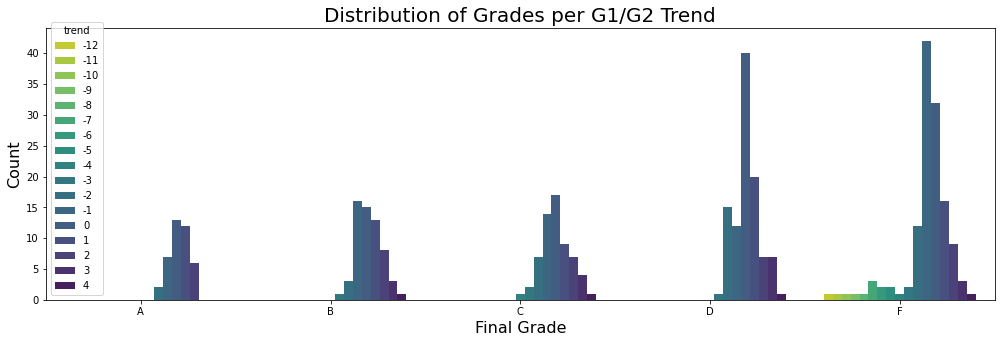

In [19]:
plt.figure(figsize=(17,5))

order = ['A', 'B', 'C', 'D', 'F'] 

sns.countplot(df['Grade'], hue ='trend', data=df, order=order, palette='viridis_r' )

plt.title("Distribution of Grades per G1/G2 Trend", fontsize=20)
plt.xlabel("Final Grade", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend(loc='lower left', title='trend')

plt.show()


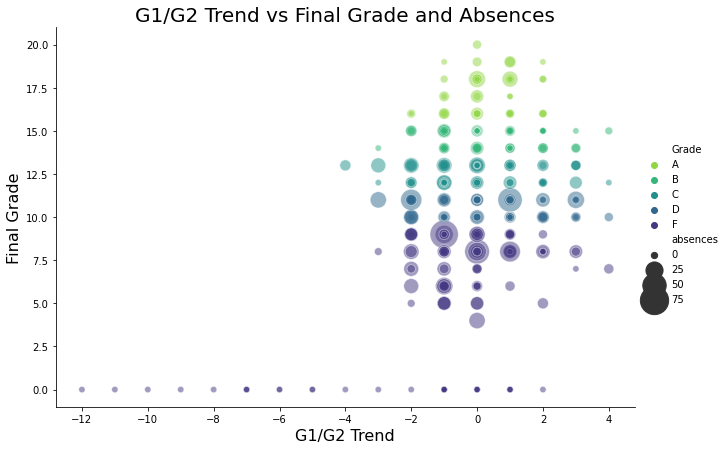

In [20]:

sns.relplot(x="trend", y="G3", hue="Grade", size="absences",  sizes=(40, 800), hue_order=['A', 'B', 'C', 'D', 'F'],
            alpha=0.5, palette="viridis_r", height=6, aspect= 1.5, data=df)

plt.title("G1/G2 Trend vs Final Grade and Absences", fontsize=20)
plt.xlabel("G1/G2 Trend", fontsize=16)
plt.ylabel("Final Grade", fontsize=16)

plt.show()

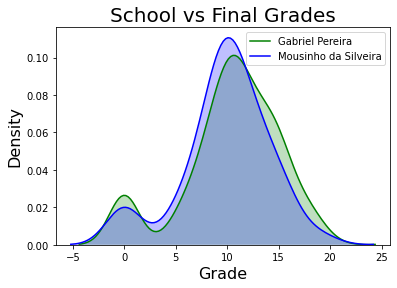

In [21]:
# grade distribution by school

sns.kdeplot(df.loc[df['school'] == 'GP', 'G3'], label='Gabriel Pereira', shade = True, color = 'green' )
sns.kdeplot(df.loc[df['school'] == 'MS', 'G3'], label='Mousinho da Silveira', shade = True, color = 'blue' )
plt.title('School vs Final Grades', fontsize = 20)
plt.xlabel('Grade', fontsize=16);
plt.ylabel('Density', fontsize=16)
plt.show()

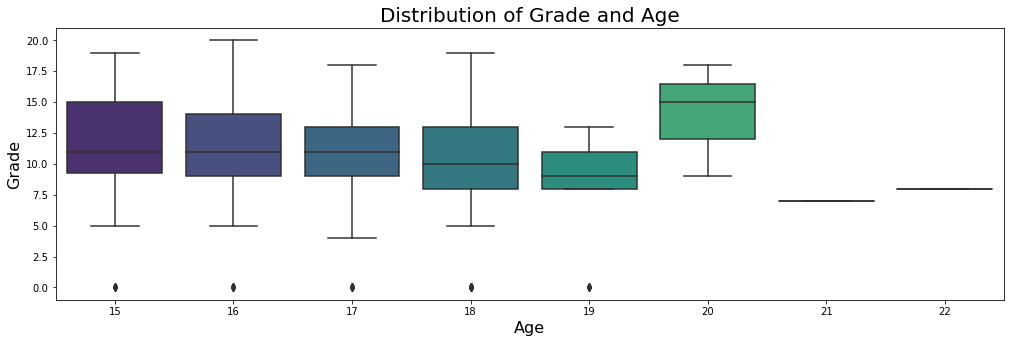

In [22]:
# plot age and grade distribution

plt.figure(figsize=(17,5))

sns.boxplot(x=df['age'], y=df['G3'], palette='viridis')

plt.title("Distribution of Grade and Age", fontsize=20)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Grade", fontsize=16)

plt.show()

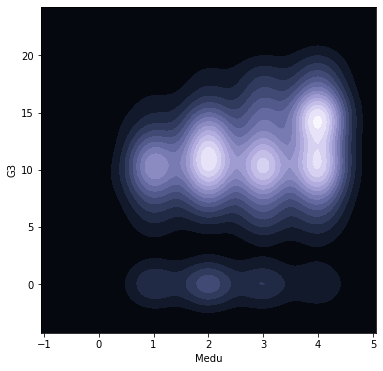

In [23]:
# Analysing the relationship between Medu and G3


f, ax = plt.subplots(figsize=(6, 6))

cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True, start=2.8, rot=0.1)

sns.kdeplot(df['Medu'], df['G3'], cmap=cmap, n_levels=16, shade=True);

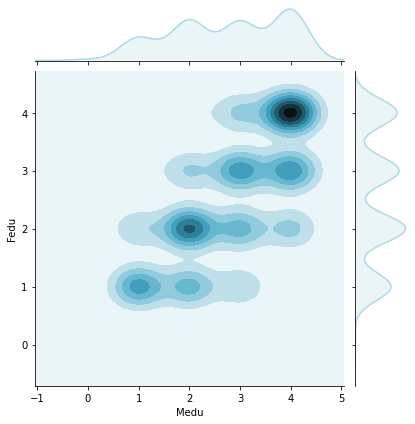

In [24]:
# Analysing the relationship between Medu and Fedu

sns.jointplot(x=df['Medu'], y=df['Fedu'], data=df, kind="kde", color='lightblue');

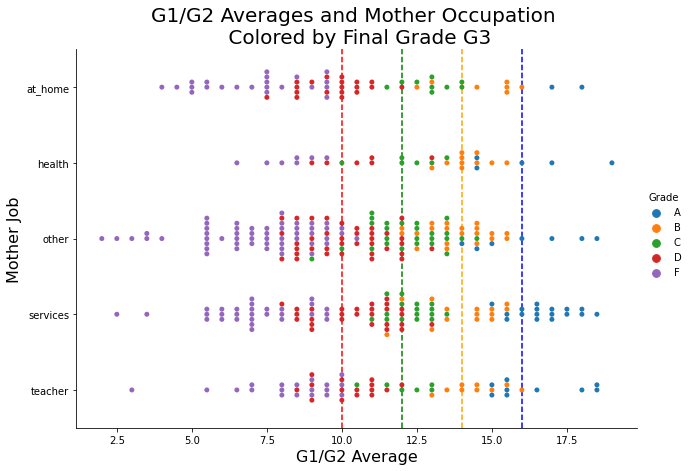

In [25]:
# plot grade avgs vs final grade for mothers job

sns.catplot(x = 'G1G2_Avg', y = 'Mjob', data = df, kind = 'swarm', hue='Grade', hue_order=['A', 'B', 'C', 'D', 'F'],  height=6, aspect= 1.5)

plt.axvline(x=10,color='red', linestyle='--')
plt.axvline(x=12,color='green', linestyle='--')
plt.axvline(x=14,color='orange', linestyle='--')
plt.axvline(x=16,color='blue', linestyle='--')

plt.title('G1/G2 Averages and Mother Occupation \n Colored by Final Grade G3', fontsize=20)
plt.xlabel('G1/G2 Average', fontsize=16)
plt.ylabel('Mother Job', fontsize=16)

plt.show()

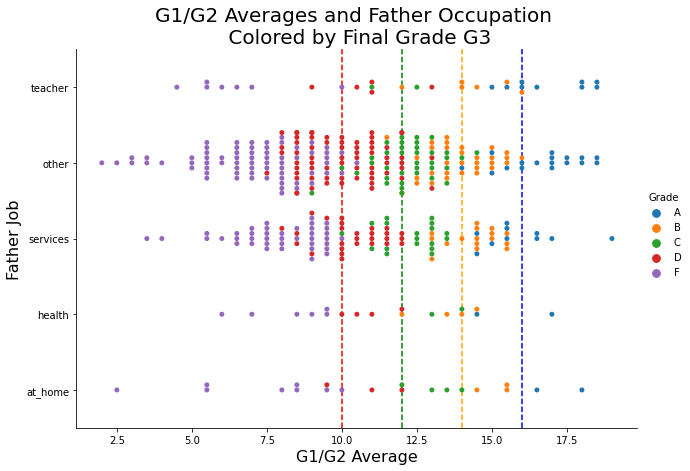

In [26]:
# plot grade avgs vs final grade for fathers job


sns.catplot(x = 'G1G2_Avg', y = 'Fjob', data = df, kind = 'swarm', hue='Grade', hue_order=['A', 'B', 'C', 'D', 'F'], height=6, aspect= 1.5)
plt.axvline(x=10,color='red', linestyle='--')
plt.axvline(x=12,color='green', linestyle='--')
plt.axvline(x=14,color='orange', linestyle='--')
plt.axvline(x=16,color='blue', linestyle='--')
plt.title('G1/G2 Averages and Father Occupation \n Colored by Final Grade G3', fontsize=20)
plt.xlabel('G1/G2 Average', fontsize=16)
plt.ylabel('Father Job', fontsize=16)
plt.show()

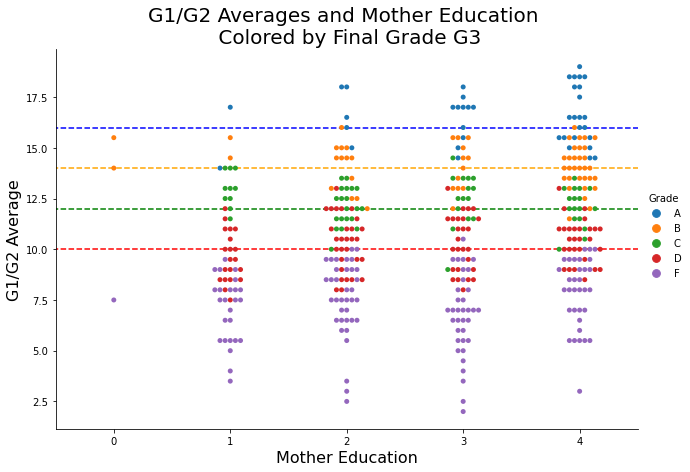

In [27]:
# plot grade avgs vs final grade for mothers education

sns.catplot(x = 'Medu', y = 'G1G2_Avg', data = df, kind = 'swarm',hue='Grade', hue_order=['A', 'B', 'C', 'D', 'F'], height=6, aspect= 1.5)
plt.hlines(y=10,color='red', xmax=5, xmin=-1, linestyle='--')
plt.hlines(y=12,color='green', xmax=5, xmin=-1, linestyle='--')
plt.hlines(y=14,color='orange', xmax=5, xmin=-1, linestyle='--')
plt.hlines(y=16,color='blue', xmax=5, xmin=-1, linestyle='--')
plt.title('G1/G2 Averages and Mother Education \n Colored by Final Grade G3', fontsize=20)
plt.xlabel('Mother Education', fontsize=16)
plt.ylabel('G1/G2 Average', fontsize=16)
plt.show()



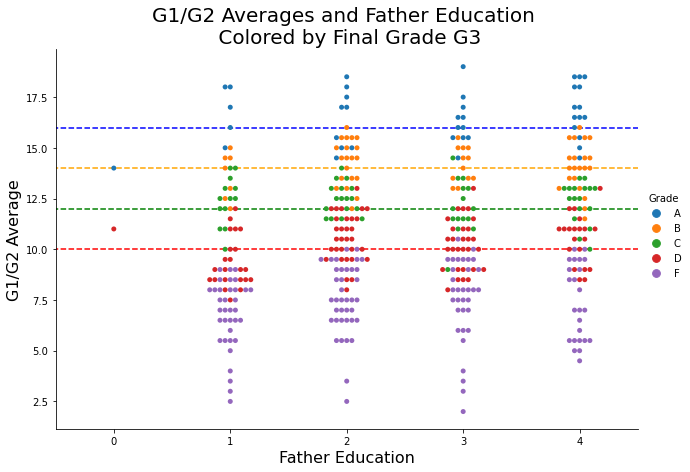

In [28]:
# plot grade avgs vs final grade for fathers education


sns.catplot(x = 'Fedu', y = 'G1G2_Avg', data = df, kind = 'swarm', hue='Grade', hue_order=['A', 'B', 'C', 'D', 'F'], height=6, aspect= 1.5)
plt.hlines(y=10,color='red', xmax=5, xmin=-1, linestyle='--')
plt.hlines(y=12,color='green', xmax=5, xmin=-1, linestyle='--')
plt.hlines(y=14,color='orange', xmax=5, xmin=-1, linestyle='--')
plt.hlines(y=16,color='blue', xmax=5, xmin=-1, linestyle='--')
plt.title('G1/G2 Averages and Father Education \n Colored by Final Grade G3', fontsize=20)
plt.xlabel('Father Education', fontsize=16)
plt.ylabel('G1/G2 Average', fontsize=16)
plt.show()

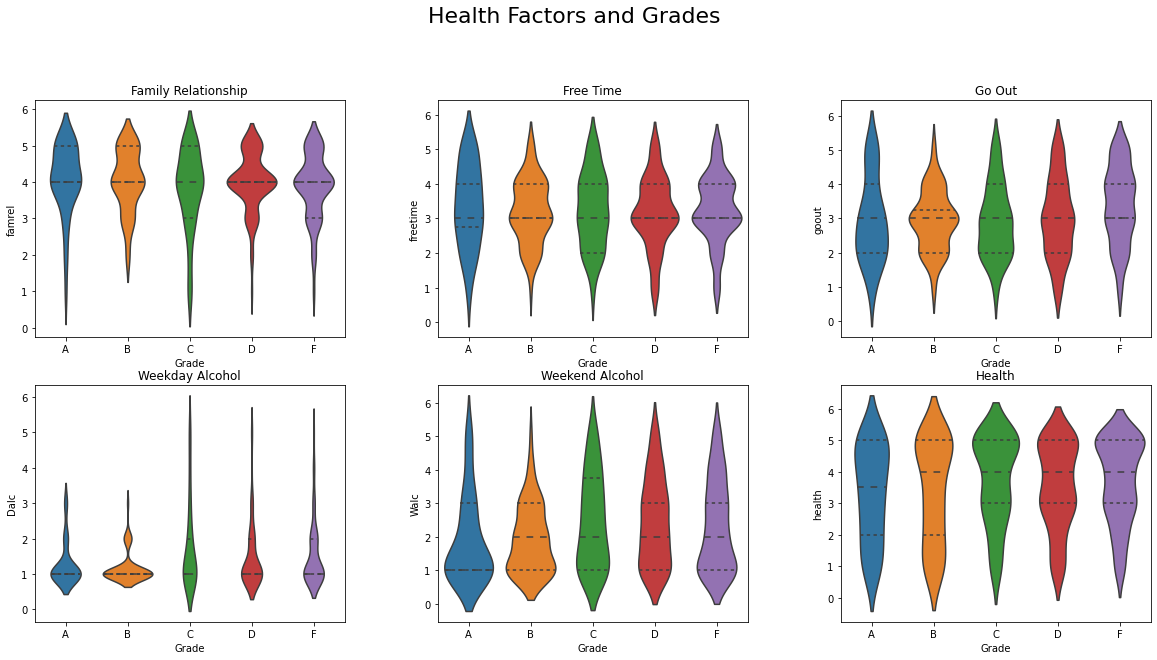

In [29]:
# plot health factors and grades


fig = plt.figure(figsize=(20, 10))

order = ['A', 'B', 'C', 'D', 'F']

title = (fig.suptitle('Health Factors and Grades', fontsize=22))
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title('Family Relationship')
ax1.set_ylabel('Relationship')
sns.violinplot(x='Grade', y='famrel', data=df, order=order, inner="quart")

ax2 = fig.add_subplot(2, 3, 2)
ax2.set_title('Free Time')
ax2.set_ylabel('Free Time')
sns.violinplot(x='Grade', y='freetime', data=df, order=order, inner="quart")

ax3 = fig.add_subplot(2, 3, 3)
ax3.set_title('Go Out')
ax3.set_ylabel('Go Out Hours')
sns.violinplot(x='Grade', y='goout', data=df, order=order, inner="quart")

ax4 = fig.add_subplot(2, 3, 4)
ax4.set_title('Weekday Alcohol')
ax4.set_ylabel('Weekday Alcohol')
sns.violinplot(x='Grade', y='Dalc', data=df, order=order, inner="quart")

ax5 = fig.add_subplot(2, 3, 5)
ax5.set_title('Weekend Alcohol')
ax5.set_ylabel('Weekend Alcohol')
sns.violinplot(x='Grade', y='Walc', data=df, order=order, inner="quart")

ax6 = fig.add_subplot(2, 3, 6)
ax6.set_title('Health')
ax6.set_ylabel('Health')
sns.violinplot(x='Grade', y='health', data=df, order=order, inner="quart")


plt.show()


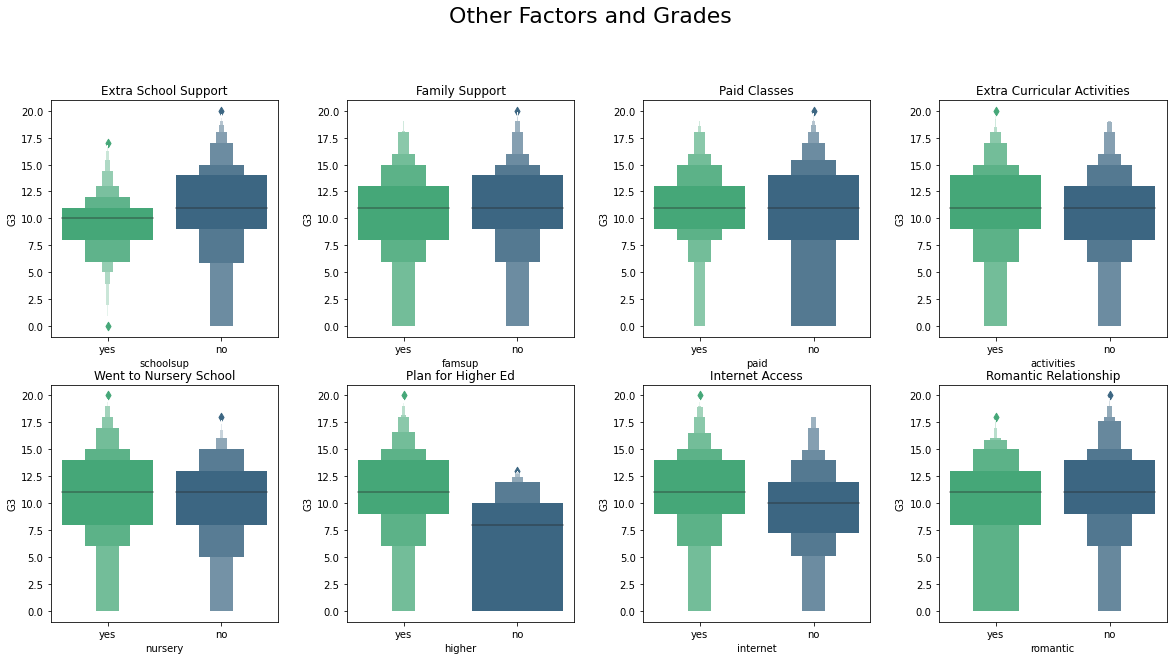

In [30]:
# plot yes/no factors and grades


fig = plt.figure(figsize=(20, 10))

title = (fig.suptitle('Other Factors and Grades', fontsize=22))
fig.subplots_adjust(top=0.85, wspace=0.3)


order = ['yes', 'no']

ax1 = fig.add_subplot(2, 4, 1)
ax1.set_title('Extra School Support')
ax1.set_xlabel('School Support')
ax1.set_ylabel('Grade')
sns.boxenplot(x='schoolsup', y='G3', data=df, ax=ax1, order = order, palette='viridis_r')

ax2 = fig.add_subplot(2, 4, 2)
ax2.set_title('Family Support')
ax2.set_xlabel('Family Support')
ax2.set_ylabel('Grade')
sns.boxenplot(x='famsup', y='G3', data=df, ax=ax2, order = order, palette='viridis_r')

ax3 = fig.add_subplot(2, 4, 3)
ax3.set_title('Paid Classes')
ax3.set_xlabel('Paid Classes')
ax3.set_ylabel('Grade')
sns.boxenplot(x='paid', y='G3', data=df, ax=ax3, order = order, palette='viridis_r')

ax4 = fig.add_subplot(2, 4, 4)
ax4.set_title('Extra Curricular Activities')
ax4.set_xlabel('Extra Curricular Activities')
ax4.set_ylabel('Grade')
sns.boxenplot(x='activities', y='G3', data=df, ax=ax4, order = order, palette='viridis_r')

ax5 = fig.add_subplot(2, 4, 5)
ax5.set_title('Went to Nursery School')
ax5.set_xlabel('Nursery School')
ax5.set_ylabel('Grade')
sns.boxenplot(x='nursery', y='G3', data=df, ax=ax5, order = order, palette='viridis_r')

ax6 = fig.add_subplot(2, 4, 6)
ax6.set_title('Plan for Higher Ed')
ax6.set_xlabel('Higher Ed')
ax6.set_ylabel('Grade')
sns.boxenplot(x='higher', y='G3', data=df, ax=ax6, order = order, palette='viridis_r')

ax7 = fig.add_subplot(2, 4, 7)
ax7.set_title('Internet Access')
ax7.set_xlabel('Internet')
ax7.set_ylabel('Grade')
sns.boxenplot(x='internet', y='G3', data=df, ax=ax7, order = order, palette='viridis_r')

ax8 = fig.add_subplot(2, 4, 8)
ax8.set_title('Romantic Relationship')
ax8.set_xlabel('Romantic Relationship')
ax8.set_ylabel('Grade')
sns.boxenplot(x='romantic', y='G3', data=df, ax=ax8, order = order, palette='viridis_r')

plt.show()


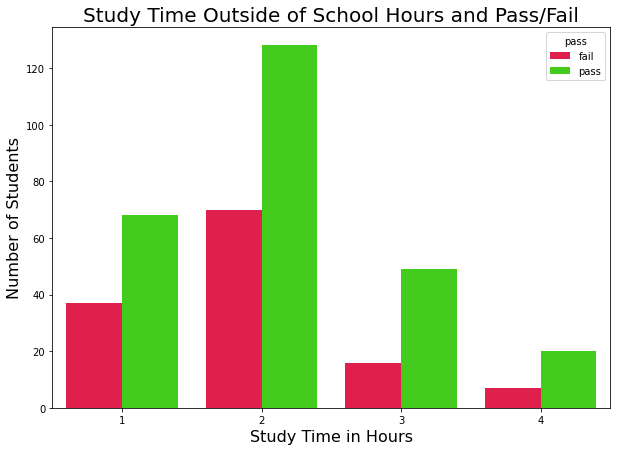

In [31]:
# plot studytime vs pass/fail


fig = plt.figure(figsize=(10, 7))

sns.countplot(data=df, x="studytime", hue="pass", palette='prism_r')

plt.title('Study Time Outside of School Hours and Pass/Fail', fontsize=20)
plt.xlabel('Study Time in Hours', fontsize=16)
plt.ylabel('Number of Students', fontsize=16)

plt.show()


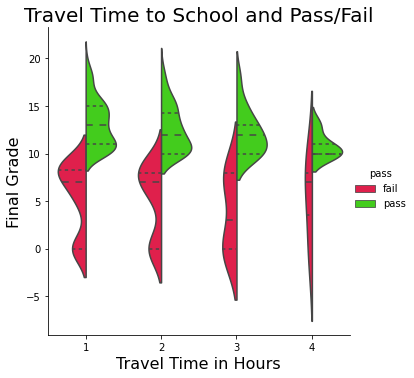

In [32]:
# plot travel time vs pass/fail

sns.catplot(x = 'traveltime', y = 'G3', kind = 'violin', 
            hue = 'pass', split = 'True', inner="quart", data = df, palette='prism_r')

plt.title('Travel Time to School and Pass/Fail', fontsize=20)
plt.xlabel('Travel Time in Hours', fontsize=16)
plt.ylabel('Final Grade', fontsize=16)

plt.show()


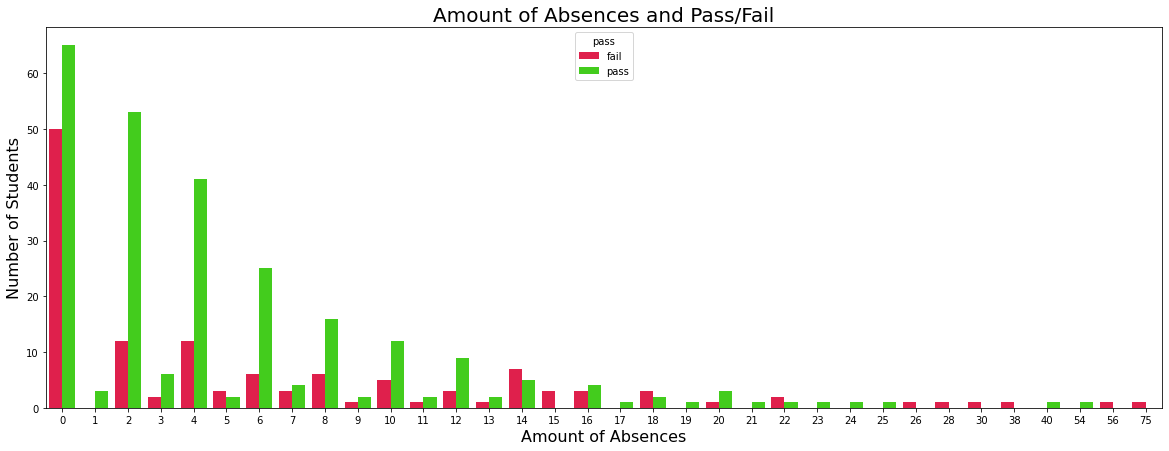

In [33]:
# plot absences vs pass/fail

fig = plt.figure(figsize=(20, 7))

study = sns.countplot(data=df, x="absences", hue="pass", palette='prism_r')

plt.title('Amount of Absences and Pass/Fail', fontsize=20)
plt.xlabel('Amount of Absences', fontsize=16)
plt.ylabel('Number of Students', fontsize=16)

plt.show()

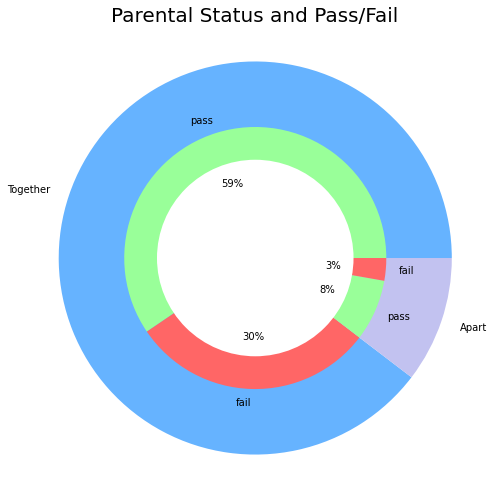

In [34]:
# plot parental status vs pass/fail

fig = plt.figure(figsize=(7, 7))

plt.title('Parental Status and Pass/Fail', fontsize=20)

labels = ['Together','Apart']
sizes = df['Pstatus'].value_counts().tolist()

labels_pass = ['pass', 'fail', 'pass', 'fail']

sizes_pass = np.concatenate([df[(df['Pstatus']=='T') & (df['pass']=='pass')].count().unique().tolist(), 
              df[(df['Pstatus']=='T') & (df['pass']=='fail')].count().unique().tolist(), 
               df[(df['Pstatus']=='A') & (df['pass']=='pass')].count().unique().tolist(), 
              df[(df['Pstatus']=='A') & (df['pass']=='fail')].count().unique().tolist()])

colors = ['#66b3ff', '#c2c2f0']
colors_pass = ['#99ff99', '#ff6666', '#99ff99', '#ff6666']


plt.pie(sizes, labels=labels, colors=colors, startangle=0, frame=True, radius=3)

plt.pie(sizes_pass, labels=labels_pass, colors=colors_pass, startangle=0, radius=2 ,autopct='%1.0f%%')

centre_circle = plt.Circle((0,0), 1.5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')


plt.tight_layout()
plt.show()





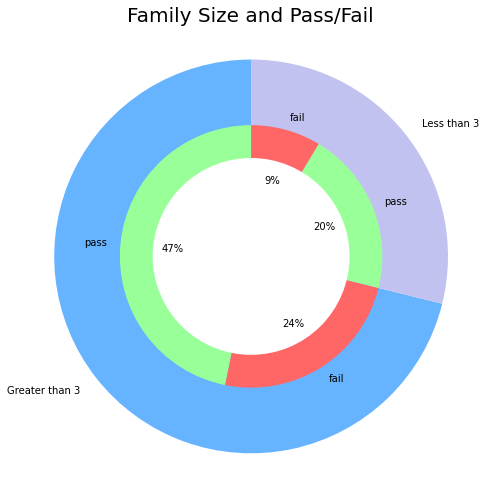

In [35]:
# plot family size vs pass/fail

fig = plt.figure(figsize=(7, 7))

plt.title('Family Size and Pass/Fail', fontsize=20)

labels = ['Greater than 3', 'Less than 3']
sizes = df['famsize'].value_counts().tolist()

labels_pass = ['pass', 'fail', 'pass', 'fail']


sizes_pass = np.concatenate([df[(df['famsize']=='GT3') & (df['pass']=='pass')].count().unique().tolist(), 
              df[(df['famsize']=='GT3') & (df['pass']=='fail')].count().unique().tolist(), 
               df[(df['famsize']=='LE3') & (df['pass']=='pass')].count().unique().tolist(), 
              df[(df['famsize']=='LE3') & (df['pass']=='fail')].count().unique().tolist()])

colors = ['#66b3ff', '#c2c2f0']
colors_pass = ['#99ff99', '#ff6666', '#99ff99', '#ff6666']

plt.pie(sizes, labels=labels, colors=colors, startangle=90, frame=True, radius=3)

plt.pie(sizes_pass, labels=labels_pass, colors=colors_pass, startangle=90, radius=2 ,autopct='%1.0f%%')

centre_circle = plt.Circle((0,0), 1.5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()


In [36]:
# set up dataframe for percentage graph 


index = ['A', 'B', 'C', 'D', 'F']


data = { 

'M' :    
np.concatenate([df[(df['sex']=='M') & (df['Grade']=='A')].count().unique().tolist(),
df[(df['sex']=='M') & (df['Grade']=='B')].count().unique().tolist(),
df[(df['sex']=='M') & (df['Grade']=='C')].count().unique().tolist(),
df[(df['sex']=='M') & (df['Grade']=='D')].count().unique().tolist(),
df[(df['sex']=='M') & (df['Grade']=='F')].count().unique().tolist()]),
    
'F' :
np.concatenate([df[(df['sex']=='F') & (df['Grade']=='A')].count().unique().tolist(),
df[(df['sex']=='F') & (df['Grade']=='B')].count().unique().tolist(),
df[(df['sex']=='F') & (df['Grade']=='C')].count().unique().tolist(),
df[(df['sex']=='F') & (df['Grade']=='D')].count().unique().tolist(),
df[(df['sex']=='F') & (df['Grade']=='F')].count().unique().tolist()])

}


data = pd.DataFrame(data, index=index)

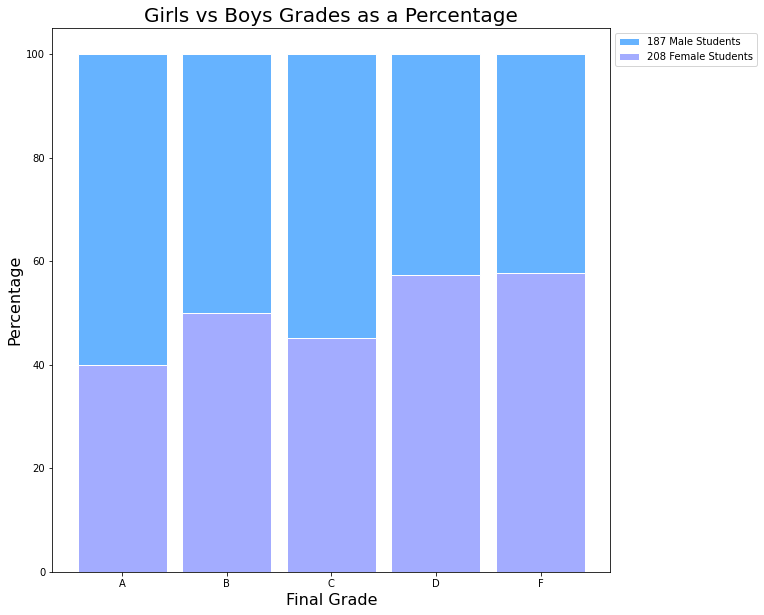

In [37]:
# plot girls and boys grades as percentages


fig = plt.figure(figsize=(10, 10))

r = [0, 1, 2, 3, 4]

totals = [i+j for i,j in zip(data['M'], data['F'])]
greenBars = [i / t * 100 for i,t in zip(data['M'], totals)]
blueBars = [i / t * 100 for i,t in zip(data['F'], totals)]


barWidth = 0.85
names = ('A','B','C','D','F')

# Create green Bars
plt.bar(r, greenBars, color='#66b3ff', bottom=blueBars, edgecolor='white', width=barWidth, label="187 Male Students")
# Create blue Bars
plt.bar(r, blueBars, color='#a3acff', edgecolor='white', width=barWidth, label="208 Female Students")

# Custom x axis
plt.xticks(r, names)
plt.xlabel("Final Grade", fontsize=16)
plt.ylabel("Percentage", fontsize=16) 
plt.title('Girls vs Boys Grades as a Percentage', fontsize=20)
    
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()

    

# Feature Engineering

In [38]:
# manulally encoding Grade column otherwise LabelEncoder will do it in reverse

fmap = {'A':4, 'B':3, 'C':2, 'D':1, 'F':0}

# apply filter to Grade column

df['Grade'] = df['Grade'].map(fmap)

In [39]:
# manulally encoding pass column 

fmap = {'pass':1, 'fail':0}

# apply filter to pass column

df['pass'] = df['pass'].map(fmap)

In [40]:
# manually encoding all yes/no varables to ensure yes=1 no=0 

fmap = {'yes':1, 'no':0}

df['schoolsup'] = df['schoolsup'].map(fmap)
df['famsup'] = df['famsup'].map(fmap)
df['paid'] = df['paid'].map(fmap)
df['activities'] = df['activities'].map(fmap)
df['nursery'] = df['nursery'].map(fmap)
df['higher'] = df['higher'].map(fmap)
df['internet'] = df['internet'].map(fmap)
df['romantic'] = df['romantic'].map(fmap)

In [41]:
# log transform exponentially distributed variables

df['absences'] = df['absences'].replace(0, 0.0001)

df['absences'] = np.log(df['absences'])



In [42]:
# avoid Dummy Variable Trap (ACTUALLY WE GET BETTER MODELS WITH THESE VARIABLES)


# df.drop(['Fedu'], inplace=True, axis=1)
# df.drop(['G1G2_Avg'], inplace=True, axis=1)
# df.drop(['trend'], inplace=True, axis=1)
# df.drop(['Walc'], inplace=True, axis=1)


In [43]:
# label encoding for correlation visualization, also for target variables as well


corr_df = df.copy()

le = LabelEncoder()

category_columns = corr_df.select_dtypes('object').columns

for i in category_columns:
    
    corr_df[i] = le.fit_transform(corr_df[i])

In [44]:
# set correlations parameters and correlate

pd.set_option('display.width', 100)
pd.set_option('precision', 3)

correlation = corr_df.corr(method='pearson')


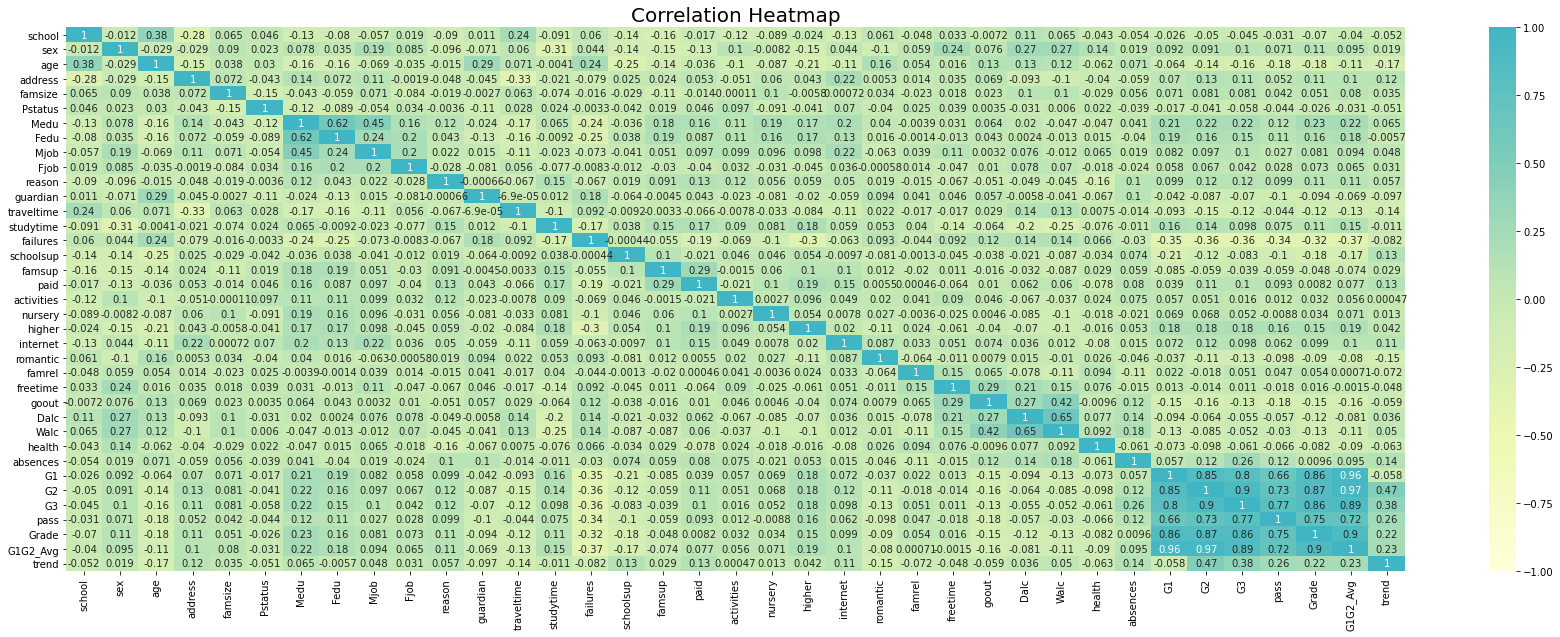

In [45]:
# show correlation heatmap

plt.figure(figsize=(30,10))

plt.title('Correlation Heatmap', fontsize=20)


sns.heatmap(correlation, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", center=1)

plt.show()

In [46]:
# find the strength of each feature on the target label

corr = abs(corr_df.corr()['G3']).sort_values()
corr.drop(['pass', 'Grade'], inplace=True)
corr = corr[:-1]

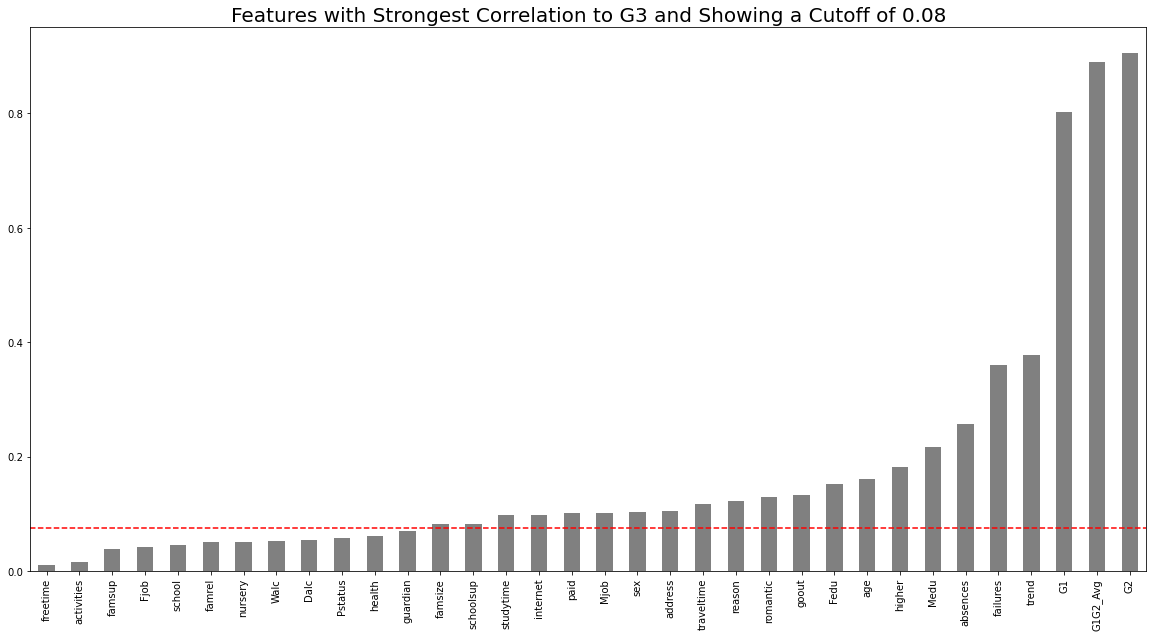

In [47]:
# visualize the strength of each feature on the target label

plt.figure(figsize=(20,10))
plt.title('Features with Strongest Correlation to G3 and Showing a Cutoff of 0.08', fontsize=20)
corr.plot(kind='bar', color='grey')
plt.hlines(y=0.075,color='red', xmax=100, xmin=-1, linestyle='--')
plt.show()

In [48]:
# filter correlations with a threshold

strong_corr = corr_df.copy()
strong_corr.drop(['Grade', 'pass'], axis=1, inplace=True)

to_drop = []


for i in range(len(corr)):

    if corr.values[i] < 0.08:
    
        to_drop.append(corr.index[i])
        
        
strong_corr.drop(to_drop, axis=1 ,inplace=True)        
        

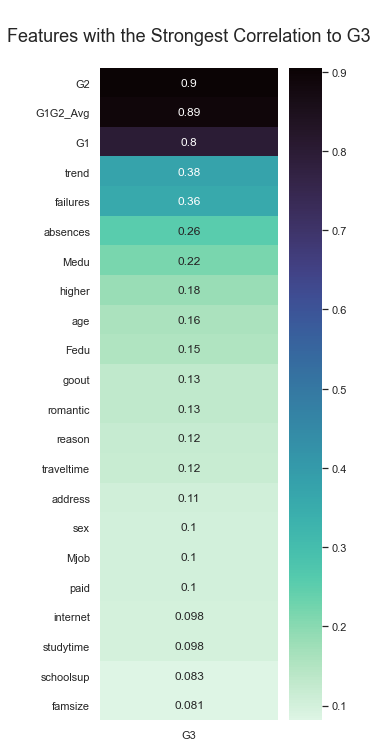

In [49]:
# plot strongest correlations


def corr_to_target(dataframe, target, title=None, file=None):
    plt.figure(figsize=(4,12))
    sns.set(font_scale=1)
    
    sns.heatmap(dataframe.corr().abs()[[target]].sort_values(target,
                                                ascending=False)[1:],
                annot=True,
                cmap='mako_r')
    
    if title: plt.title(f'\n{title}\n', fontsize=18)

    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return


corr_to_target(strong_corr, 'G3','Features with the Strongest Correlation to G3')
             

In [50]:
# generate binary values using get_dummies

cols = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason',
        'guardian','schoolsup','famsup','paid','activities','nursery', 
        'higher', 'internet', 'romantic']

hot_df = pd.get_dummies(corr_df, columns=cols, drop_first=True, sparse=False )



In [51]:
# generate binary values using get_dummies

cols = ['sex','address','famsize','Mjob','reason','schoolsup','paid', 'higher', 'internet', 'romantic']

strong_hot_df = pd.get_dummies(strong_corr, columns=cols, drop_first=True, sparse=False )


# Feature Selection

In [52]:
# select the features and target variables

X = corr_df.drop(['Grade','pass', 'G3'], axis=1)
XX = corr_df.drop(['Grade','pass', 'G3', 'G2', 'trend', 'G1G2_Avg'], axis=1)
XXX = corr_df.drop(['Grade','pass', 'G3', 'G2', 'G1', 'trend', 'G1G2_Avg'], axis=1)

S = strong_corr.drop(['G3'], axis=1)
SS = strong_corr.drop(['G3', 'G2', 'trend', 'G1G2_Avg'], axis=1)
SSS = strong_corr.drop(['G3', 'G2', 'G1', 'trend', 'G1G2_Avg'], axis=1)

O = hot_df.drop(['Grade','pass', 'G3'], axis=1)
OO = hot_df.drop(['Grade','pass', 'G3', 'G2', 'trend', 'G1G2_Avg'], axis=1)
OOO = hot_df.drop(['Grade','pass', 'G3', 'G2', 'G1', 'trend', 'G1G2_Avg'], axis=1)

SO = strong_hot_df.drop(['G3'], axis=1)
SSOO = strong_hot_df.drop(['G3', 'G2', 'trend', 'G1G2_Avg'], axis=1)
SSSOOO = strong_hot_df.drop(['G3', 'G2', 'G1', 'trend', 'G1G2_Avg'], axis=1)


y = corr_df['G3']
yy = corr_df['pass']
yyy = corr_df['Grade']


In [53]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G1G2_Avg,trend
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,1.792,5,6,5.5,1
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,1.386,5,5,5.0,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,2.303,7,8,7.5,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0.693,15,14,14.5,-1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,1.386,6,10,8.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,4,4,5,4,2.398,9,9,9.0,0
391,1,1,17,1,1,1,3,1,3,3,...,4,5,3,4,2,1.099,14,16,15.0,2
392,1,1,21,0,0,1,1,1,2,2,...,5,3,3,3,3,1.099,10,8,9.0,-2
393,1,1,18,0,1,1,3,2,3,2,...,4,1,3,4,5,-9.210,11,12,11.5,1


In [54]:
S

,sex,age,address,famsize,Medu,Fedu,Mjob,reason,traveltime,studytime,...,paid,higher,internet,romantic,goout,absences,G1,G2,G1G2_Avg,trend
0,0,18,1,0,4,4,0,0,2,2,...,0,1,0,0,4,1.792,5,6,5.5,1
1,0,17,1,0,1,1,0,0,1,2,...,0,1,1,0,3,1.386,5,5,5.0,0
2,0,15,1,1,1,1,0,2,1,2,...,1,1,1,0,2,2.303,7,8,7.5,1
3,0,15,1,0,4,2,1,1,1,3,...,1,1,1,1,2,0.693,15,14,14.5,-1
4,0,16,1,0,3,3,2,1,1,2,...,1,1,0,0,2,1.386,6,10,8.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,2,2,3,0,1,2,...,1,1,0,0,4,2.398,9,9,9.0,0
391,1,17,1,1,3,1,3,0,2,1,...,0,1,1,0,5,1.099,14,16,15.0,2
392,1,21,0,0,1,1,2,0,1,1,...,0,1,0,0,3,1.099,10,8,9.0,-2
393,1,18,0,1,3,2,3,0,3,1,...,0,1,1,0,1,-9.210,11,12,11.5,1


In [55]:
O

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_1,guardian_2,schoolsup_1,famsup_1,paid_1,activities_1,nursery_1,higher_1,internet_1,romantic_1
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,0,0,0,0,1,1,0


In [56]:
SO

,age,Medu,Fedu,traveltime,studytime,failures,goout,absences,G1,G2,...,Mjob_3,Mjob_4,reason_1,reason_2,reason_3,schoolsup_1,paid_1,higher_1,internet_1,romantic_1
0,18,4,4,2,2,0,4,1.792,5,6,...,0,0,0,0,0,1,0,1,0,0
1,17,1,1,1,2,0,3,1.386,5,5,...,0,0,0,0,0,0,0,1,1,0
2,15,1,1,1,2,3,2,2.303,7,8,...,0,0,0,1,0,1,1,1,1,0
3,15,4,2,1,3,0,2,0.693,15,14,...,0,0,1,0,0,0,1,1,1,1
4,16,3,3,1,2,0,2,1.386,6,10,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,4,2.398,9,9,...,1,0,0,0,0,0,1,1,0,0
391,17,3,1,2,1,0,5,1.099,14,16,...,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,3,1.099,10,8,...,0,0,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,1,-9.210,11,12,...,1,0,0,0,0,0,0,1,1,0


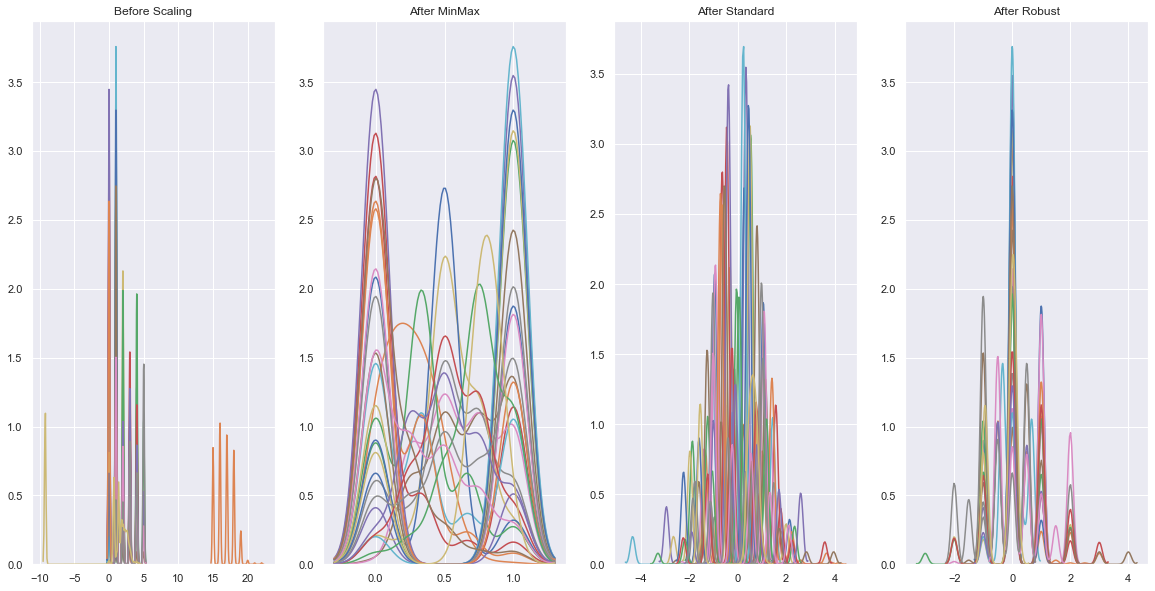

In [57]:
# plot all scalers


scaler = MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(X)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=X.columns)

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=X.columns)
    
scaler = RobustScaler()
robust_scaled_df = scaler.fit_transform(X)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=X.columns)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 10))

ax1.set_title('Before Scaling')
sns.kdeplot(X['sex'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['age'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['address'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['famsize'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['Pstatus'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['Medu'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['Fedu'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['Mjob'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['Fjob'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['reason'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['guardian'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['traveltime'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['studytime'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['failures'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['schoolsup'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['famsup'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['paid'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['activities'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['nursery'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['higher'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['internet'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['romantic'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['famrel'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['freetime'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['goout'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['Dalc'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['Walc'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['health'], ax=ax1, legend=False, bw=0.1)
sns.kdeplot(X['absences'], ax=ax1, legend=False, bw=0.1)


# MinMax scaler works better for cases where the distribution is not Gaussian or the 
# standard deviation is very small. However, it is sensitive to outliers, so if there 
# are outliers in the data, you might want to consider another scaler.

ax2.set_title('After MinMax')
sns.kdeplot(minmax_scaled_df['sex'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['age'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['address'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['famsize'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['Pstatus'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['Medu'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['Fedu'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['Mjob'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['Fjob'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['reason'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['guardian'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['traveltime'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['studytime'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['failures'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['schoolsup'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['famsup'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['paid'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['activities'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['nursery'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['higher'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['internet'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['romantic'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['famrel'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['freetime'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['goout'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['Dalc'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['Walc'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['health'], ax=ax2, legend=False, bw=0.1)
sns.kdeplot(minmax_scaled_df['absences'], ax=ax2, legend=False, bw=0.1)


# The Standard scaler assumes your data is normally distributed within each 
# feature and will scale them such that the distribution is now centered around 0, 
# with a standard deviation of 1.


ax3.set_title('After Standard')
sns.kdeplot(scaled_df['sex'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['age'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['address'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['famsize'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['Pstatus'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['Medu'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['Fedu'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['Mjob'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['Fjob'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['reason'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['guardian'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['traveltime'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['studytime'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['failures'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['schoolsup'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['famsup'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['paid'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['activities'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['nursery'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['higher'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['internet'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['romantic'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['famrel'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['freetime'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['goout'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['Dalc'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['Walc'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['health'], ax=ax3, legend=False, bw=0.1)
sns.kdeplot(scaled_df['absences'], ax=ax3, legend=False, bw=0.1)



# If your data contains many outliers, scaling using the mean and standard deviation
# of the data is likely to not work very well. In these cases, you can use the RobustScaler. 
# It removes the median and scales the data according to the quantile range. 


ax4.set_title('After Robust')
sns.kdeplot(robust_scaled_df['sex'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['age'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['address'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['famsize'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['Pstatus'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['Medu'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['Fedu'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['Mjob'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['Fjob'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['reason'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['guardian'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['traveltime'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['studytime'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['failures'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['schoolsup'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['famsup'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['paid'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['activities'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['nursery'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['higher'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['internet'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['romantic'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['famrel'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['freetime'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['goout'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['Dalc'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['Walc'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['health'], ax=ax4, legend=False, bw=0.1)
sns.kdeplot(robust_scaled_df['absences'], ax=ax4, legend=False, bw=0.1)


plt.show()



# 1) Regression Modeling (Number Grade)

## A) Modeling After the Second Trimester (G1, G2) for Final Grade (G3)

###  Test all models and select the best

In [58]:
# list all models to quickly evaluate

models = [] 
models.append(('LR', LinearRegression())) 
models.append(('LASSO', Lasso())) 
models.append(('EN', ElasticNet())) 
models.append(('KNN', KNeighborsRegressor())) 
models.append(('DTR', DecisionTreeRegressor())) 
models.append(('SVR', SVR()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('XGBR', XGBRegressor(silent=True)))


In [59]:
# evaluate models using cross validation score:

results = [] 
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42) 
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error') 
    results.append(cv_results) 
    names.append(name) 
    print("The Model:{} has an MAE of: {:.3f} and STD of: {:.3f}".format(name, -1*cv_results.mean(), cv_results.std()))

The Model:LR has an MAE of: 1.347 and STD of: 0.191
The Model:LASSO has an MAE of: 1.120 and STD of: 0.242
The Model:EN has an MAE of: 1.157 and STD of: 0.200
The Model:KNN has an MAE of: 1.150 and STD of: 0.209
The Model:DTR has an MAE of: 1.086 and STD of: 0.210
The Model:SVR has an MAE of: 1.093 and STD of: 0.319
The Model:ABR has an MAE of: 1.254 and STD of: 0.256
The Model:GBR has an MAE of: 1.114 and STD of: 0.207
The Model:RFR has an MAE of: 1.012 and STD of: 0.198
The Model:ETR has an MAE of: 1.040 and STD of: 0.221
The Model:XGBR has an MAE of: 1.137 and STD of: 0.201


### i) Random Forest Regressor

In [70]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=corr_df['failures'])


# build a pipeline to prevent data leakage while scaling

pipe = Pipeline([
    
    ('normalize' , MinMaxScaler()),
    ('model' , RandomForestRegressor(random_state=42, verbose=False))       
])


# list hyperparameters to tune

params = {
    
    'model__warm_start':[True,False],
    'model__bootstrap':[True,False],
    'model__max_depth':np.arange(1, 221, 20),
    'model__min_samples_split':np.arange(2,42, 10),
    'model__min_samples_leaf':[1], 
    'model__min_weight_fraction_leaf':np.arange(0.0,0.1, 0.01),
    'model__max_leaf_nodes':np.arange(0, 200, 20),
    'model__min_impurity_decrease':np.arange(0.0, 0.5, 0.01),
    'model__oob_score':[False],
    'model__ccp_alpha':np.arange(0.0,0.5, 0.01),
    'model__max_samples':np.arange(100, 221, 20),
    'model__n_estimators':np.arange(1, 821, 40)    
}

# set up and fit RandomizedSearchCV

rs = RandomizedSearchCV(estimator=pipe, param_distributions=params, cv=10, scoring='neg_mean_absolute_error', n_iter=60, random_state=42)

rs.fit(X_train, y_train)


# fit and predict and evaluate model

best_rfr = rs.best_estimator_

best_rfr.fit(X_train, y_train)

y_predict = best_rfr.predict(X_test)

score = r2_score(y_test, y_predict)

mae_1 = mean_absolute_error(y_test, y_predict)


print('\n')
print('RANDOM FOREST REGRESSOR','\n' )
display('Best Params:',rs.best_params_ )
print('Best MAE Score:', -1*rs.best_score_,'\n' )
print('Test R2 Score: ',round(score,3),'\n')  
print('Test MAE',round(mae_1, 3 ))



RANDOM FOREST REGRESSOR 



'Best Params:'

{'model__warm_start': True,
 'model__oob_score': False,
 'model__n_estimators': 41,
 'model__min_weight_fraction_leaf': 0.0,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 1,
 'model__min_impurity_decrease': 0.06,
 'model__max_samples': 200,
 'model__max_leaf_nodes': 20,
 'model__max_depth': 101,
 'model__ccp_alpha': 0.02,
 'model__bootstrap': False}

Best MAE Score: 1.1687401586141166 

Test R2 Score:  0.875 

Test MAE 0.802


## B) Modeling After the First Trimester (G1) for Final Grade (G3)

### i) Random Forest Regressor

In [71]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.3, random_state=42, stratify=corr_df['failures'])


# build a pipeline to prevent data leakage while scaling

pipe = Pipeline([
    
    ('normalize' , MinMaxScaler()),
    ('model' , RandomForestRegressor(random_state=42, verbose=False))       
])


# list hyperparameters to tune

params = {

    'model__warm_start':[True, False],
    'model__bootstrap':[True, False],
    'model__n_estimators':np.arange(1, 821, 40)

}

# set up and fit RandomizedSearchCV

rs = RandomizedSearchCV(estimator=pipe, param_distributions=params, cv=10, scoring='neg_mean_absolute_error', n_iter=60, random_state=42)

rs.fit(X_train, y_train)


# fit and predict and evaluate model

best_rfr = rs.best_estimator_

best_rfr.fit(X_train, y_train)

y_predict = best_rfr.predict(X_test)

score = r2_score(y_test, y_predict)

mae_2 = mean_absolute_error(y_test, y_predict)

print('\n')
print('RANDOM FOREST REGRESSOR','\n' )
display('Best Params:',rs.best_params_ )
print('Best MAE Score:', -1*rs.best_score_,'\n' )
print('Test R2 Score: ',round(score,3),'\n')  
print('Test MAE',round(mae_2, 3 ))



RANDOM FOREST REGRESSOR 



'Best Params:'

{'model__warm_start': False,
 'model__n_estimators': 481,
 'model__bootstrap': True}

Best MAE Score: 1.902149952149952 

Test R2 Score:  0.838 

Test MAE 1.321


## C) Modeling Before the Start of School for Final Grade (G3)


### i) Random Forest Regressor

In [72]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(XXX, y, test_size=0.3, random_state=42, stratify=corr_df['failures'])


# build a pipeline to prevent data leakage while scaling

pipe = Pipeline([
    
    ('normalize' , MinMaxScaler()),
    ('model' , RandomForestRegressor(random_state=42, verbose=False))       
])


# list hyperparameters to tune

params = {

    'model__warm_start':[True, False],
    'model__bootstrap':[True, False],
    'model__n_estimators':np.arange(1, 200, 10)

}

# set up and fit RandomizedSearchCV

rs = RandomizedSearchCV(estimator=pipe, param_distributions=params, cv=10, scoring='neg_mean_absolute_error', n_iter=60, random_state=42)

rs.fit(X_train, y_train)


# fit and predict and evaluate model

best_rfr = rs.best_estimator_

best_rfr.fit(X_train, y_train)

y_predict = best_rfr.predict(X_test)

score = r2_score(y_test, y_predict)

mae_3 = mean_absolute_error(y_test, y_predict)


print('\n')
print('RANDOM FOREST REGRESSOR','\n' )
display('Best Params:',rs.best_params_ )
print('Best MAE Score:', -1*rs.best_score_,'\n' )
print('Test R2 Score: ',round(score,3),'\n')  
print('Test MAE',round(mae_3, 3 ))



RANDOM FOREST REGRESSOR 



'Best Params:'

{'model__warm_start': False,
 'model__n_estimators': 191,
 'model__bootstrap': True}

Best MAE Score: 3.175457768913266 

Test R2 Score:  0.326 

Test MAE 2.623


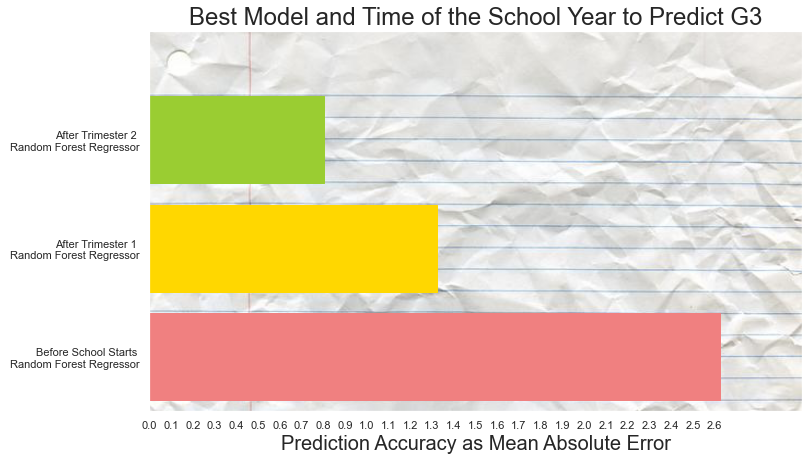

In [155]:

img = mpimg.imread('paper.png', 0)


fig, ax = plt.subplots(figsize=(20, 7))


ax.imshow(img, extent=[0, 6, -0.5, 3])

y_labels = ['Before School Starts \n Random Forest Regressor', 
            'After Trimester 1 \n Random Forest Regressor', 
            'After Trimester 2 \n Random Forest Regressor' ]


x_values = [mae_3*2, mae_2*2, mae_1*2]


ax.set_xticks(np.arange(0, 6, 0.2))
ax.set_xticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6])

ax.set_yticks(np.arange(0, 3, 1))

ax.set_xlabel("Prediction Accuracy as Mean Absolute Error", fontsize=20)
ax.set_title('Best Model and Time of the School Year to Predict G3', fontsize=24, loc='center')

color_list =['lightcoral', 'gold','yellowgreen']

plt.grid(b=None)

ax = plt.barh(y_labels, x_values, color = color_list, edgecolor=color_list)


plt.show()


# 2) Classification Modeling (Pass/Fail)

## A) Modeling After the Second Trimester (G1, G2) for Pass/Fail


###  Test all models and select the best

In [1980]:
# Classification Model List

models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('XGBC', XGBClassifier()))



In [1981]:
# evaluate models using cross validation score:

results = [] 
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42) 
    cv_results = cross_val_score(model, X, yy, cv=kfold, scoring='f1') 
    results.append(cv_results) 
    names.append(name) 
    print("The Model:{} has an F1 Score of: {:.3f} and STD of: {:.3f}".format(name, cv_results.mean(), cv_results.std()))

The Model:LR has an F1 Score of: 0.928 and STD of: 0.040
The Model:KNN has an F1 Score of: 0.924 and STD of: 0.037
The Model:SVM has an F1 Score of: 0.927 and STD of: 0.033
The Model:NB has an F1 Score of: 0.816 and STD of: 0.226
The Model:DTC has an F1 Score of: 0.917 and STD of: 0.031
The Model:ABC has an F1 Score of: 0.911 and STD of: 0.048
The Model:GBC has an F1 Score of: 0.922 and STD of: 0.048
The Model:RFC has an F1 Score of: 0.937 and STD of: 0.034
The Model:ETC has an F1 Score of: 0.919 and STD of: 0.039
The Model:XGBC has an F1 Score of: 0.931 and STD of: 0.033


### i)  Logistic Regression

In [158]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, yy, test_size=0.3, random_state=42, stratify=corr_df['failures'])


# build a pipeline to prevent data leakage while scaling

pipe = Pipeline([
    
    ('normalize' , MinMaxScaler()),
    ('model' , LogisticRegression(random_state=42, verbose=False))       
])


# list hyperparameters to tune

params = {
    
          'model__penalty': ['l1', 'l2'],
          'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'model__tol':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'model__warm_start': [False, True],
          'model__max_iter': np.arange(50, 350, 50)
         }

# set up and fit RandomizedSearchCV

rs = RandomizedSearchCV(estimator=pipe, param_distributions=params, cv=10, scoring='f1', n_iter=60, random_state=42)

rs.fit(X_train, y_train)


# fit and predict and evaluate model

best_lr = rs.best_estimator_

best_lr.fit(X_train, y_train)

y_predict = best_lr.predict(X_test)

a_score_1 = accuracy_score(y_test, y_predict)

f_score = f1_score(y_test, y_predict)

r_score = recall_score(y_test, y_predict)

p_score = precision_score(y_test, y_predict)

f05_score_1 = fbeta_score(y_test, y_predict, beta=0.5)


print('\n')
print('LOGISTIC REGRESSION','\n' )
display('Best Params:',rs.best_params_ )
print('Best F1 Score:', round(rs.best_score_,3),'\n' )
print('Test Accuracy Score: ',round(a_score_1,3),'\n')  
print('Test F1 Score: ', round(f_score,3),'\n' )
print('Test Recall Score: ', round(r_score,3),'\n' )
print('Test Precision Score: ',round(p_score,3),'\n')
print('Test F0.5 Score: ', round(f05_score_1,3),'\n' )



LOGISTIC REGRESSION 



'Best Params:'

{'model__warm_start': False,
 'model__tol': 0.1,
 'model__penalty': 'l2',
 'model__max_iter': 150,
 'model__C': 100}

Best F1 Score: 0.937 

Test Accuracy Score:  0.908 

Test F1 Score:  0.93 

Test Recall Score:  0.88 

Test Precision Score:  0.986 

Test F0.5 Score:  0.963 



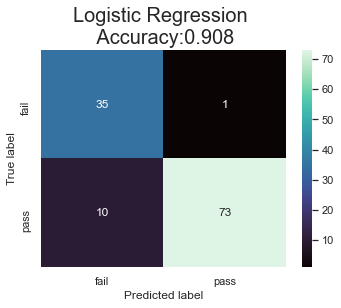

True Negatives:  35
False Positives:  1
False Negatives:  10
True Positives:  73


In [1985]:
cm = confusion_matrix(y_test, y_predict)

cm_df = pd.DataFrame(cm,
                     index = ['fail','pass'], 
                     columns = ['fail','pass'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, cmap='mako')
plt.title('Logistic Regression \n Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)), fontsize=20)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)


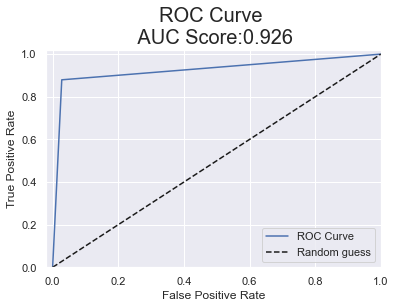

In [1986]:

fpr, tpr, thresholds = roc_curve(y_test, y_predict)



# create plot
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
g = plt.xlabel('False Positive Rate')
g = plt.ylabel('True Positive Rate')
g = plt.title('ROC Curve \n AUC Score:{0:.3f}'.format(roc_auc_score(y_test, y_predict)), fontsize=20)
g = plt.xlim([-0.02, 1])
g = plt.ylim([0, 1.02])
g = plt.legend(loc="lower right")


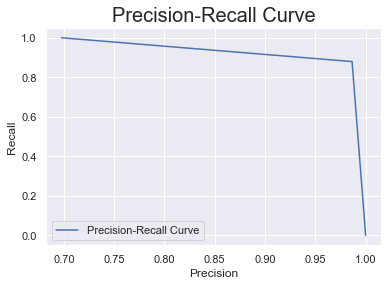

In [1987]:

precision, recall, thresholds = precision_recall_curve(y_test, y_predict)

# create plot
plt.plot(precision, recall, label='Precision-Recall Curve')
g = plt.xlabel('Precision')
g = plt.ylabel('Recall')
g = plt.title('Precision-Recall Curve', fontsize=20)
g = plt.legend(loc="lower left")

## B) Modeling After the First Trimester (G1) for Pass/Fail



### i) Random Forest Classifier

In [159]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3, random_state=42, stratify=corr_df['failures'])


# build a pipeline to prevent data leakage while scaling

pipe = Pipeline([
    
    ('normalize' , MinMaxScaler()),
    ('model' , RandomForestClassifier(random_state=42, verbose=False))       
])


# list hyperparameters to tune

params = {

    'model__warm_start':[True, False],
    'model__bootstrap':[True, False],
    'model__n_estimators':np.arange(1, 200, 10)

}

# set up and fit RandomizedSearchCV

rs = RandomizedSearchCV(estimator=pipe, param_distributions=params, cv=10, scoring='f1', n_iter=60, random_state=42)

rs.fit(X_train, y_train)


# fit and predict and evaluate model

best_rfc = rs.best_estimator_

best_rfc.fit(X_train, y_train)

y_predict = best_rfc.predict(X_test)

a_score_2 = accuracy_score(y_test, y_predict)

f_score = f1_score(y_test, y_predict)

r_score = recall_score(y_test, y_predict)

p_score = precision_score(y_test, y_predict)

f05_score_2 = fbeta_score(y_test, y_predict, beta=0.5)

print('\n')
print('RANDOM FOREST CLASSIFIER','\n' )
display('Best Params:',rs.best_params_ )
print('Best F1 Score:', round(rs.best_score_,3),'\n' )
print('Test Accuracy Score: ',round(a_score_2,3),'\n')  
print('Test F1 Score: ', round(f_score,3),'\n' )
print('Test Recall Score: ', round(r_score,3),'\n' )
print('Test Precision Score: ',round(p_score,3),'\n')
print('Test F0.5 Score: ', round(f05_score_2,3),'\n' )



RANDOM FOREST CLASSIFIER 



'Best Params:'

{'model__warm_start': False,
 'model__n_estimators': 191,
 'model__bootstrap': True}

Best F1 Score: 0.868 

Test Accuracy Score:  0.866 

Test F1 Score:  0.904 

Test Recall Score:  0.904 

Test Precision Score:  0.904 

Test F0.5 Score:  0.904 



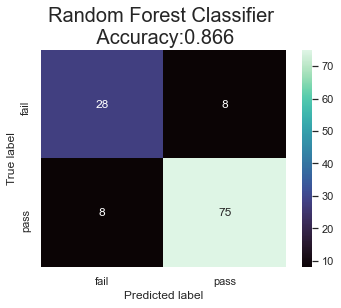

True Negatives:  28
False Positives:  8
False Negatives:  8
True Positives:  75


In [1989]:
cm = confusion_matrix(y_test, y_predict)


cm_df = pd.DataFrame(cm,
                     index = ['fail','pass'], 
                     columns = ['fail','pass'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, cmap='mako')
plt.title('Random Forest Classifier \n Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)), fontsize=20)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

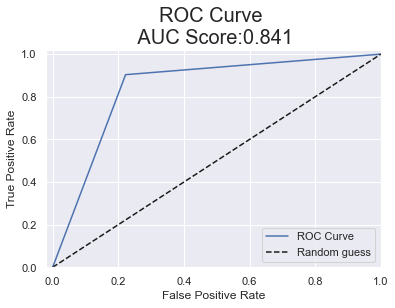

In [1990]:

fpr, tpr, thresholds = roc_curve(y_test, y_predict)

# create plot
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
g = plt.xlabel('False Positive Rate')
g = plt.ylabel('True Positive Rate')
g = plt.title('ROC Curve \n AUC Score:{0:.3f}'.format(roc_auc_score(y_test, y_predict)), fontsize=20)
g = plt.xlim([-0.02, 1])
g = plt.ylim([0, 1.02])
g = plt.legend(loc="lower right")

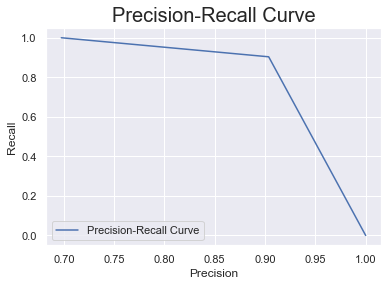

In [1991]:

precision, recall, thresholds = precision_recall_curve(y_test, y_predict)

# create plot
plt.plot(precision, recall, label='Precision-Recall Curve')
g = plt.xlabel('Precision')
g = plt.ylabel('Recall')
g = plt.title('Precision-Recall Curve', fontsize=20)
g = plt.legend(loc="lower left")

## C) Modeling Before the Start of School for Pass/Fail



### i) SVC

In [160]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(XXX, yy, test_size=0.3, random_state=42, stratify=corr_df['failures'])


# build a pipeline to prevent data leakage while scaling

pipe = Pipeline([
    
    ('normalize' , MinMaxScaler()),
    ('model' , SVC(random_state=42, verbose=False))       
])


# list hyperparameters to tune

params = {
          'model__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
           'model__tol':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'model__shrinking': [True, False],
            'model__probability': [True, False],
           'model__gamma': ['scale', 'auto']

}


# set up and fit RandomizedSearchCV

rs = RandomizedSearchCV(estimator=pipe, param_distributions=params, cv=10, scoring='f1', n_iter=60, random_state=42)

rs.fit(X_train, y_train)


# fit and predict and evaluate model

best_svc = rs.best_estimator_

best_svc.fit(X_train, y_train)

y_predict = best_svc.predict(X_test)

a_score_3 = accuracy_score(y_test, y_predict)

f_score = f1_score(y_test, y_predict)

r_score = recall_score(y_test, y_predict)

p_score = precision_score(y_test, y_predict)

f05_score_3 = fbeta_score(y_test, y_predict, beta=0.5)


print('\n')
print('SVC CLASSIFIER','\n' )
display('Best Params:',rs.best_params_ )
print('Best F1 Score:', round(rs.best_score_,3),'\n' )
print('Test Accuracy Score: ',round(a_score_3,3),'\n')  
print('Test F1 Score: ', round(f_score,3),'\n' )
print('Test Recall Score: ', round(r_score,3),'\n' )
print('Test Precision Score: ',round(p_score,3),'\n')
print('Test F0.5 Score: ', round(f05_score_3,3),'\n' )



SVC CLASSIFIER 



'Best Params:'

{'model__tol': 0.001,
 'model__shrinking': True,
 'model__probability': True,
 'model__gamma': 'scale',
 'model__C': 1}

Best F1 Score: 0.803 

Test Accuracy Score:  0.739 

Test F1 Score:  0.838 

Test Recall Score:  0.964 

Test Precision Score:  0.741 

Test F0.5 Score:  0.777 



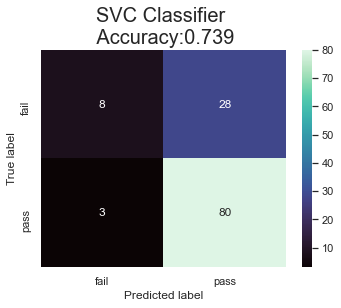

True Negatives:  8
False Positives:  28
False Negatives:  3
True Positives:  80


In [1993]:
cm = confusion_matrix(y_test, y_predict)


cm_df = pd.DataFrame(cm,
                     index = ['fail','pass'], 
                     columns = ['fail','pass'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, cmap='mako')
plt.title('SVC Classifier \n Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)), fontsize=20)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

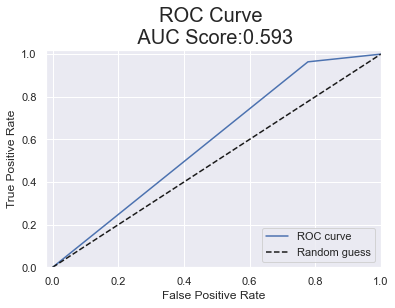

In [1994]:

fpr, tpr, thresholds = roc_curve(y_test, y_predict)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
g = plt.xlabel('False Positive Rate')
g = plt.ylabel('True Positive Rate')
g = plt.title('ROC Curve \n AUC Score:{0:.3f}'.format(roc_auc_score(y_test, y_predict)), fontsize=20)
g = plt.xlim([-0.02, 1])
g = plt.ylim([0, 1.02])
g = plt.legend(loc="lower right")

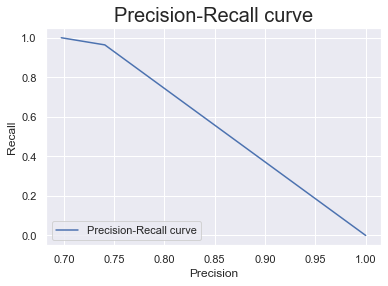

In [1995]:

precision, recall, thresholds = precision_recall_curve(y_test, y_predict)

# create plot
plt.plot(precision, recall, label='Precision-Recall curve')
g = plt.xlabel('Precision')
g = plt.ylabel('Recall')
g = plt.title('Precision-Recall curve', fontsize=20)
g = plt.legend(loc="lower left")

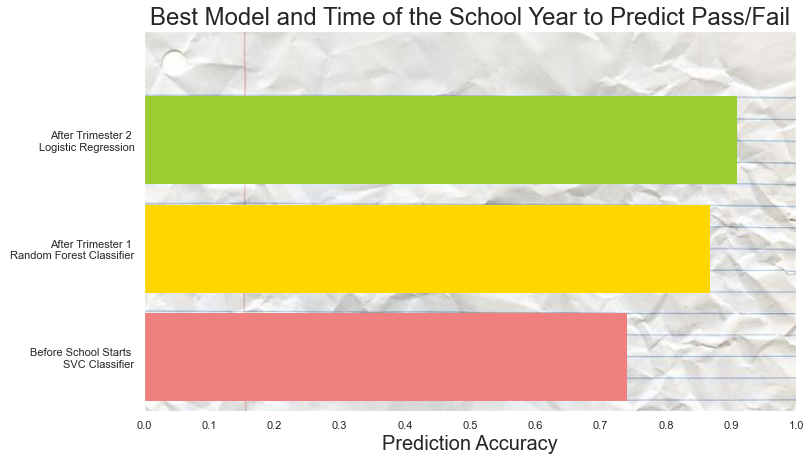

In [192]:

img = mpimg.imread('paper.png', 0)


fig, ax = plt.subplots(figsize=(20, 7))


ax.imshow(img, extent=[0, 6, -0.5, 3])

y_labels = ['Before School Starts \n SVC Classifier', 
            'After Trimester 1 \n Random Forest Classifier', 
            'After Trimester 2 \n Logistic Regression' ]

x_values = [a_score_3*6, a_score_2*6, a_score_1*6]


ax.set_xticks(np.arange(0, 30, 0.6))
ax.set_xticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

ax.set_yticks(np.arange(0, 3, 1))


ax.set_xlabel("Prediction Accuracy", fontsize=20)
ax.set_title('Best Model and Time of the School Year to Predict Pass/Fail', fontsize=24)

color_list =['lightcoral', 'gold','yellowgreen']

plt.grid(b=None)

ax = plt.barh(y_labels, x_values, color = color_list, edgecolor=color_list)


plt.show()

# 3) Classification Modeling (Letter Grade)

## A) Modeling After the Second Trimester (G1, G2) for Letter Grade (A, B, C, D, F)



### Test all models to select the best

In [1998]:
# Model List
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('XGBC', XGBClassifier()))


In [1999]:
# evaluate models using cross validation score:
results = [] 
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42) 
    cv_results = cross_val_score(model, X, yyy, cv=kfold, scoring='f1_weighted') 
    results.append(cv_results) 
    names.append(name) 
    print("The Model:{} has an F1 Score of:{:.3f} and STD of:{:.3f}".format(name, cv_results.mean(), cv_results.std()))

The Model:LR has an F1 Score of:0.638 and STD of:0.117
The Model:KNN has an F1 Score of:0.655 and STD of:0.071
The Model:SVM has an F1 Score of:0.693 and STD of:0.051
The Model:NB has an F1 Score of:0.602 and STD of:0.112
The Model:DTC has an F1 Score of:0.626 and STD of:0.074
The Model:ABC has an F1 Score of:0.416 and STD of:0.097
The Model:GBC has an F1 Score of:0.730 and STD of:0.064
The Model:RFC has an F1 Score of:0.723 and STD of:0.040
The Model:ETC has an F1 Score of:0.685 and STD of:0.054
The Model:XGBC has an F1 Score of:0.728 and STD of:0.050


### i) XG Boost Classifier

In [193]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, yyy, test_size=0.3, random_state=42)


# build a pipeline to prevent data leakage while scaling

pipe = Pipeline([
    
    ('normalize' , MinMaxScaler()),
    ('model' , XGBClassifier(random_state=42, verbose=False))       
])


# list hyperparameters to tune

params = {'model__penalty': ['l1', 'l2'],
          'model__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
         }

# set up and fit RandomizedSearchCV

rs = RandomizedSearchCV(estimator=pipe, param_distributions=params, cv=10, scoring='f1_weighted', n_iter=40, random_state=42)

rs.fit(X_train, y_train)


# fit and predict and evaluate model

best_xgbc = rs.best_estimator_

best_xgbc.fit(X_train, y_train)

y_predict = best_xgbc.predict(X_test)

a_score_1 = accuracy_score(y_test, y_predict)

f_score = f1_score(y_test, y_predict, average='weighted')

r_score = recall_score(y_test, y_predict, average='weighted')

p_score = precision_score(y_test, y_predict, average='weighted')

f05_score_1 = fbeta_score(y_test, y_predict, beta=0.5, average='weighted')


print('\n')
print('XG BOOST CLASSIFIER','\n' )
display('Best Params:',rs.best_params_ )
print('Best F1 Score:', round(rs.best_score_,3),'\n' )
print('Test Accuracy Score: ',round(a_score_1,3),'\n')  
print('Test F1 Score: ', round(f_score,3),'\n' )
print('Test Recall Score: ', round(r_score,3),'\n' )
print('Test Precision Score: ',round(p_score,3),'\n')
print('Test F0.5 Score: ', round(f05_score_1,3),'\n' )




XG BOOST CLASSIFIER 



'Best Params:'

{'model__penalty': 'l1', 'model__C': 1e-05}

Best F1 Score: 0.72 

Test Accuracy Score:  0.782 

Test F1 Score:  0.774 

Test Recall Score:  0.782 

Test Precision Score:  0.779 

Test F0.5 Score:  0.775 



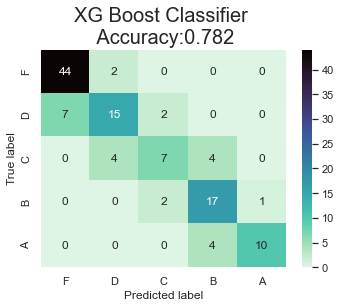

In [2001]:
cm = confusion_matrix(y_test, y_predict)


cm_df = pd.DataFrame(cm,
                     index = ['F','D','C','B','A'], 
                     columns = ['F','D','C','B','A'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, cmap='mako_r')
plt.title('XG Boost Classifier \n Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)), fontsize=20)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



## B) Modeling After the First Trimester (G1) for Letter Grade (A, B, C, D, F)



### i) XG Boost Classifier

In [194]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(XX, yyy, test_size=0.3, random_state=42)


# build a pipeline to prevent data leakage while scaling

pipe = Pipeline([
    
    ('normalize' , MinMaxScaler()),
    ('model' , XGBClassifier(random_state=42, verbose=False))       
])


# list hyperparameters to tune

params = {'model__penalty': ['l1', 'l2'],
          'model__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] }


# set up and fit RandomizedSearchCV

rs = RandomizedSearchCV(estimator=pipe, param_distributions=params, cv=10, scoring='f1_weighted', n_iter=40, random_state=42)

rs.fit(X_train, y_train)


# fit and predict and evaluate model

best_xgbc = rs.best_estimator_

best_xgbc.fit(X_train, y_train)

y_predict = best_xgbc.predict(X_test)

a_score_2 = accuracy_score(y_test, y_predict)

f_score = f1_score(y_test, y_predict, average='weighted')

r_score = recall_score(y_test, y_predict, average='weighted')

p_score = precision_score(y_test, y_predict, average='weighted')

f05_score_2 = fbeta_score(y_test, y_predict, beta=0.5, average='weighted')


print('\n')
print('XG BOOST CLASSIFIER','\n' )
display('Best Params:',rs.best_params_ )
print('Best F1 Score:', round(rs.best_score_,3),'\n' )
print('Test Accuracy Score: ',round(a_score_2,3),'\n')  
print('Test F1 Score: ', round(f_score,3),'\n' )
print('Test Recall Score: ', round(r_score,3),'\n' )
print('Test Precision Score: ',round(p_score,3),'\n')
print('Test F0.5 Score: ', round(f05_score_2,3),'\n' )




XG BOOST CLASSIFIER 



'Best Params:'

{'model__penalty': 'l1', 'model__C': 1e-05}

Best F1 Score: 0.503 

Test Accuracy Score:  0.639 

Test F1 Score:  0.643 

Test Recall Score:  0.639 

Test Precision Score:  0.663 

Test F0.5 Score:  0.652 



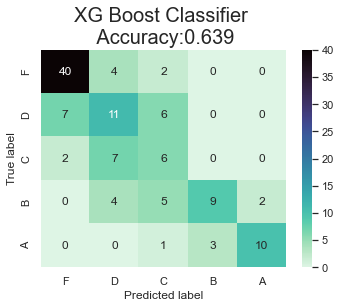

In [2003]:
cm = confusion_matrix(y_test, y_predict)


cm_df = pd.DataFrame(cm,
                     index = ['F','D','C','B','A'], 
                     columns = ['F','D','C','B','A'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, cmap='mako_r')
plt.title('XG Boost Classifier \n Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)), fontsize=20)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



## C) Modeling Before the Start of School for Letter Grade (A, B, C, D, F)



### i) Logistic Regression

In [195]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(XXX, yyy, test_size=0.3, random_state=42)


# build a pipeline to prevent data leakage while scaling

pipe = Pipeline([
    
    ('normalize' , MinMaxScaler()),
    ('model' , LogisticRegression(random_state=42, verbose=False))       
])


# list hyperparameters to tune

params = {
    
          'model__penalty': ['l1', 'l2'],
          'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'model__tol':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'model__warm_start': [False, True],
          'model__max_iter': np.arange(50, 350, 50)
         }

# set up and fit RandomizedSearchCV

rs = RandomizedSearchCV(estimator=pipe, param_distributions=params, cv=10, scoring='f1_weighted', n_iter=60, random_state=42)

rs.fit(X_train, y_train)


# fit and predict and evaluate model

best_lr = rs.best_estimator_

best_lr.fit(X_train, y_train)

y_predict = best_lr.predict(X_test)

a_score_3 = accuracy_score(y_test, y_predict)

f_score = f1_score(y_test, y_predict, average='weighted')

r_score = recall_score(y_test, y_predict, average='weighted')

p_score = precision_score(y_test, y_predict, average='weighted')

f05_score_3 = fbeta_score(y_test, y_predict, beta=0.5, average='weighted')


print('\n')
print('LOGISTIC REGRESSION','\n' )
display('Best Params:',rs.best_params_ )
print('Best F1 Score:', round(rs.best_score_,3),'\n' )
print('Test Accuracy Score: ',round(a_score_3,3),'\n')  
print('Test F1 Score: ', round(f_score,3),'\n' )
print('Test Recall Score: ', round(r_score,3),'\n' )
print('Test Precision Score: ',round(p_score,3),'\n')
print('Test F0.5 Score: ', round(f05_score_3,3),'\n' )



LOGISTIC REGRESSION 



'Best Params:'

{'model__warm_start': False,
 'model__tol': 0.1,
 'model__penalty': 'l2',
 'model__max_iter': 50,
 'model__C': 1}

Best F1 Score: 0.336 

Test Accuracy Score:  0.345 

Test F1 Score:  0.352 

Test Recall Score:  0.345 

Test Precision Score:  0.378 

Test F0.5 Score:  0.364 



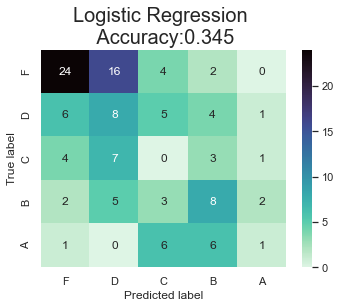

In [2005]:
cm = confusion_matrix(y_test, y_predict)


cm_df = pd.DataFrame(cm,
                     index = ['F','D','C','B','A'], 
                     columns = ['F','D','C','B','A'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, cmap='mako_r')
plt.title('Logistic Regression \n Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)), fontsize=20)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



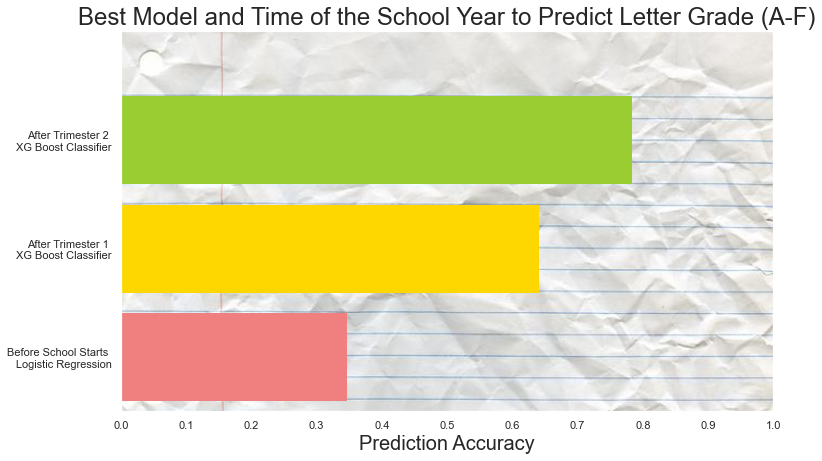

In [198]:
img = mpimg.imread('paper.png', 0)


fig, ax = plt.subplots(figsize=(20, 7))


ax.imshow(img, extent=[0, 6, -0.5, 3])

y_labels = ['Before School Starts \n Logistic Regression', 
            'After Trimester 1 \n XG Boost Classifier', 
            'After Trimester 2 \n XG Boost Classifier' ]


x_values = [a_score_3*6, a_score_2*6, a_score_1*6]

ax.set_xticks(np.arange(0, 30, 0.6))
ax.set_xticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

ax.set_yticks(np.arange(0, 3, 1))

ax.set_xlabel("Prediction Accuracy", fontsize=20)
ax.set_title('Best Model and Time of the School Year to Predict Letter Grade (A-F)', fontsize=24)

color_list =['lightcoral', 'gold','yellowgreen']

plt.grid(b=None)

ax = plt.barh(y_labels, x_values, color = color_list, edgecolor=color_list)

plt.show()

# Keras

In [67]:
from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks
from keras import regularizers
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


## A) Regression 

### i) Predict Final Grade (G3) after Second Trimester (G1, G2)

119/119 [==============================] - 0s 39us/step
Val Loss MAE & Test MAE: [1.7361834950807715, 1.0335828065872192]


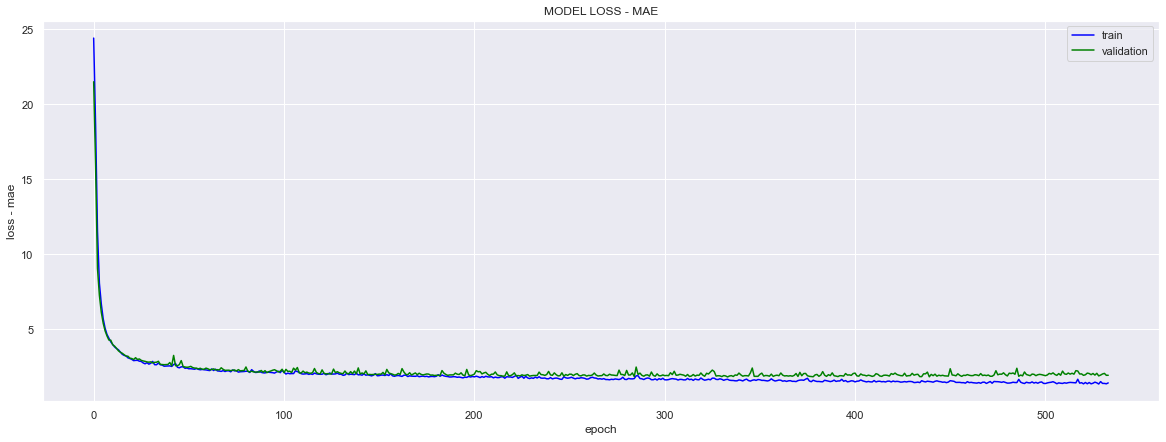

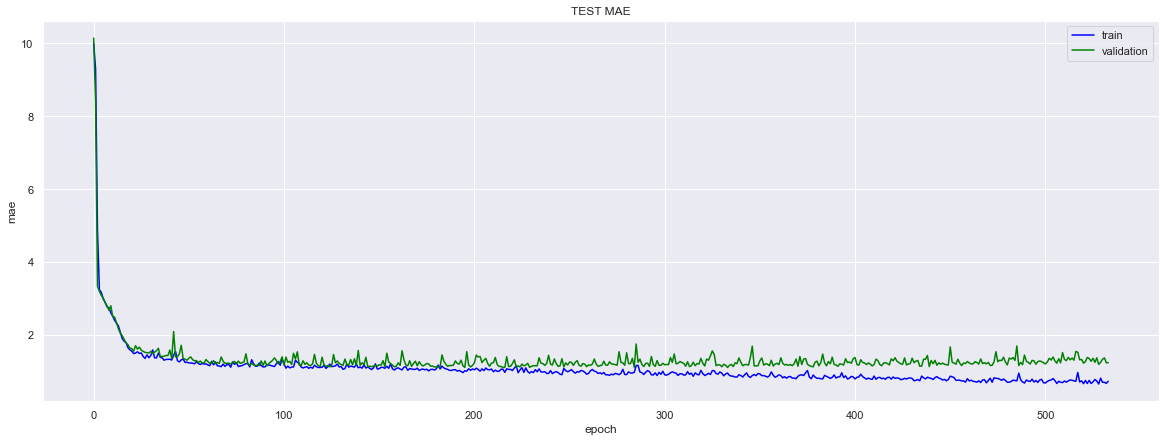

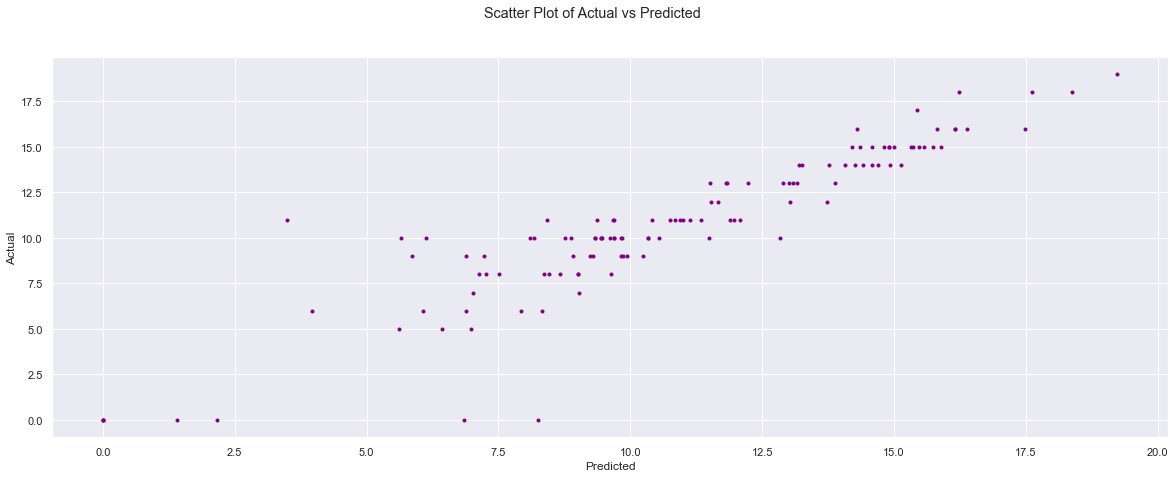

In [68]:

# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=corr_df['failures'])


# scale 

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


# Instantiate a Sequential model

model = Sequential()

model.add(Dense(72, input_shape=(34,), activation='relu', kernel_regularizer= regularizers.l2(0.2)))

model.add(Dense(36,activation='relu', kernel_regularizer= regularizers.l2(0.1)))

model.add(Dense(18,activation='relu', kernel_regularizer= regularizers.l2(0.1)))

model.add(Dense(9,activation='relu', kernel_regularizer= regularizers.l2(0.1)))

model.add(Dense(6,activation='relu', kernel_regularizer= regularizers.l2(0.01)))

model.add(Dense(3,activation='relu', kernel_regularizer= regularizers.l2(0.001)))

model.add(Dense(1,activation='linear'))


optimizer = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)


# compile the model

model.compile(optimizer=optimizer, loss='mean_absolute_error',  metrics=['mae'])


# early stop and checkpoint

stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=200)

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=0, save_best_only=True)


# fit model data and set epochs batch size

history = model.fit(X_train, y_train, epochs = 5000, batch_size=6, validation_split = 0.2, verbose=0, callbacks=[stop, checkpoint])

# Evaluate your model accuracy on the test set

accuracy_score = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

# Print accuracy

print('Val Loss MAE & Test MAE:', accuracy_score)


# "Loss - MAE"
fig = plt.figure(figsize=(20, 7))
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='green')
plt.title('MODEL LOSS - MAE')
plt.ylabel('loss - mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


# "Test - MAE"
fig = plt.figure(figsize=(20, 7))
plt.plot(history.history['mae'], color='blue')
plt.plot(history.history['val_mae'], color='green')
plt.title('TEST MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# "Scatter - Actual vs Predicted"
fig = plt.figure(figsize=(20, 7))
fig.suptitle('Scatter Plot of Actual vs Predicted')
plt.scatter(x=y_pred, y=y_test, marker='.', color='purple')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()